## Dataset Description

The dataset was taken from the following Kaggle Competition, https://www.kaggle.com/competitions/march-machine-learning-mania-2025. The datasets provided as part of the competition contains information about NCAA Basketball games played between Division I college basketball teams and its different seasons. A large amount of historical data is provided about college basketball games and teams, going back many years. The features in the datasets chosen as part of this project which contains information aout the men's and women's basketball games individually have been combined and rearranged. The final dataset being used here have the following features-
Season - this is the year of the associated entry in MSeasons.csv or WSeasons.csv, namely the year in which the final tournament occurs.

**DayNum** - this integer always ranges from 0 to 132, and tells you what day the game was played on.

**TeamID** - this identifies the id number of the team 

**Score** - this identifies the number of points scored by the team.

**Loc** - this identifies the "location" of the winning team. If the winning team was the home team, this value will be "H". If the winning team was the visiting (or "away") team, this value will be "A". If it was played on a neutral court, then this value will be "N".

**NumOT** - this indicates the number of overtime periods in the game, an integer 0 or higher.

**FGM** - field goals made

**FGA** - field goals attempted

**FGM3** - three pointers made

**FGA3** - three pointers attempted

**FTM** - free throws made

**FTA** - free throws attempted

**OR** - offensive rebounds

**DR** - defensive rebounds

**Ast** - assists

**TO** - turnovers committed

**Stl** - steals accomplished

**Blk** - blocks accomplished

**PF** - personal fouls committed

## R1. Problem Statement

There are two problem that we are aiming to solve with this project, they are as follows:

**Q1. Can machine learning models accurately predict game outcomes based on historical game statistics?**

This problem statement involves using the historical NCAA Basketball matches' data to train machine learning models and then evaluating how well they perform in predicitng whether a team will win a match or not based on game statistics like number of points scored, filed goals scored, field goals attempted, three pointers or free throws made, three pointers or free throws attempted, asstst made, turnovers committed etc.
This problem statement attempts to checks the effectiveness of machine learning models in predicting game outcomes. Moreover, it also provides a comprehensive comparison of different machine learning models for use in sports analytics. Evaluation metrics like Accuracy, precision, recall, F1 Score will be used to compare the models' performance. Model Hyperparameter tuning will also be done under this problem statement to check if there is a way to improve the performance of these machine learning models.

This problem statement has significant relevance in academic as well as industrial sports analytics. Predicting game outcomes as part of Sports analytics not only helps in optimising individula game performace but it also helps in strategising and coaching at a the team level. By predicting the game outcomes beforehand, teams can come up with alternative strategies and game plays.


**Q2. Which game statistics are most predictive of whether a team wins or loses a game?**

This problem statement aim to find which game statistics which are provided as part of the dataset contribute the most to the prediciton of whether a team will win or lose a game. These can be any of either the offensive or defensive indicators. In order to understand which feature contributes the most to the prediction of a game, we will use feature importace analysis or look at the features with highest weight coefficients to determine the important game statistics

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## Loading the Datasets

In [2]:
data1 = pd.read_csv("WRegularSeasonDetailedResults.csv")
data1.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,...,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,...,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,...,14,19,23,17,23,8,15,6,0,15
3,2010,11,3111,63,3267,58,A,0,27,52,...,26,16,25,22,22,15,11,14,5,14
4,2010,11,3119,74,3447,70,H,1,30,74,...,17,11,21,21,32,12,14,4,2,14


In [3]:
data2 = pd.read_csv("WNCAATourneyDetailedResults.csv")
data2.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,138,3124,69,3201,55,N,0,28,57,...,34,3,5,17,19,12,18,4,1,18
1,2010,138,3173,67,3395,66,N,0,23,59,...,27,14,15,18,26,8,8,8,6,22
2,2010,138,3181,72,3214,37,H,0,26,57,...,15,3,8,10,21,4,16,6,4,20
3,2010,138,3199,75,3256,61,H,0,25,63,...,20,17,22,16,21,13,16,5,4,24
4,2010,138,3207,62,3265,42,N,0,24,68,...,26,11,17,16,22,9,10,3,4,12


In [4]:
data3 = pd.read_csv("MRegularSeasonDetailedResults.csv")
data3.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [5]:
data4 = pd.read_csv("MNCAATourneyDetailedResults.csv")
data4.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


## R2.1. Combining the Datasets and Dataset Preparation

The initial datasets contains the information about winning and losing teams and ther corresponding game statistics simultaneously. In the final dataset that will be explored and further used for model training, we are seperating the winning and losing teams' game statistics into different rows so that the models can be trained on individual teams' game statitics to make a prediction.

In [6]:
data = pd.concat([data1, data2, data3, data4])
print(f"The shape of the new combined dataset is: {data.shape}")

# print the columns of the combined dataset
data.columns

The shape of the new combined dataset is: (202866, 34)


Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [7]:
#we will drop the day and season columns from the dataset
data.drop(columns = ["Season", "DayNum"], inplace = True)

We will rearrange the data and add another column with win or loss classification and on the basis of all the features it would be decided whether the team lost or won

In [8]:
w_cols = ["WTeamID", "WScore", "WFGM", "WFGA", "WFGM3", "WFGA3", "WFTM", "WFTA", "WOR", "WDR", "WAst", "WTO", "WStl", 
          "WBlk", "WPF", "NumOT"]

l_cols = ['LTeamID', 'LScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl',
          'LBlk', 'LPF', 'NumOT']

In [9]:
cols = ["TeamID", "Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF", "NumOT"]

w_df = pd.DataFrame()
w_df = data[w_cols]
w_df.columns = cols
w_df["Win/Loss"] = 1


l_df = pd.DataFrame()
l_df = data[l_cols]
l_df.columns = cols
l_df["Win/Loss"] = 0

print(f"Length of l_df: {len(l_df)}")
print(f"Length of w_df: {len(w_df)}")

Length of l_df: 202866
Length of w_df: 202866


C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_16188\3111021318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_df["Win/Loss"] = 1
C:\Users\Nadiyah Ahmed\AppData\Local\Temp\ipykernel_16188\3111021318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l_df["Win/Loss"] = 0


In [10]:
#a dataset where the data of winning and losing teams is combined

df = pd.concat([w_df, l_df])
df.reset_index()

df.head()

,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,NumOT,Win/Loss
0,3103,63,23,54,5,9,12,19,10,26,14,18,7,0,15,0,1
1,3104,73,26,62,5,12,16,28,16,31,15,20,5,2,25,0,1
2,3110,71,29,62,6,15,7,12,14,23,18,13,6,2,17,0,1
3,3111,63,27,52,4,11,5,9,6,40,14,27,5,10,18,0,1
4,3119,74,30,74,7,20,7,11,14,33,18,11,5,3,18,1,1


In [11]:
df.isna().sum()

TeamID      0
Score       0
FGM         0
FGA         0
FGM3        0
FGA3        0
FTM         0
FTA         0
OR          0
DR          0
Ast         0
TO          0
Stl         0
Blk         0
PF          0
NumOT       0
Win/Loss    0
dtype: int64

## R2.2. Exploratory Data Analysis

In [12]:
df.describe()

,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,NumOT,Win/Loss
count,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000,405732.000000
mean,2100.204012,67.711704,24.113274,57.198836,6.314222,19.030335,13.170933,18.841536,10.926900,23.988613,13.015914,14.356908,7.046035,3.296908,17.760179,0.061656,0.500000
std,988.273035,13.108485,5.097415,7.786555,3.056629,6.327664,5.949107,7.764574,4.447321,5.318312,4.532397,4.819019,3.298047,2.284148,4.531530,0.286888,0.500001
min,1101.000000,11.000000,3.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1257.000000,59.000000,21.000000,52.000000,4.000000,15.000000,9.000000,13.000000,8.000000,20.000000,10.000000,11.000000,5.000000,2.000000,15.000000,0.000000,0.000000
50%,1410.000000,67.000000,24.000000,57.000000,6.000000,19.000000,13.000000,18.000000,11.000000,24.000000,13.000000,14.000000,7.000000,3.000000,18.000000,0.000000,0.500000
75%,3245.000000,76.000000,27.000000,62.000000,8.000000,23.000000,17.000000,24.000000,14.000000,27.000000,16.000000,17.000000,9.000000,5.000000,21.000000,0.000000,1.000000
max,3480.000000,149.000000,59.000000,113.000000,30.000000,80.000000,50.000000,67.000000,45.000000,58.000000,45.000000,49.000000,36.000000,23.000000,47.000000,6.000000,1.000000


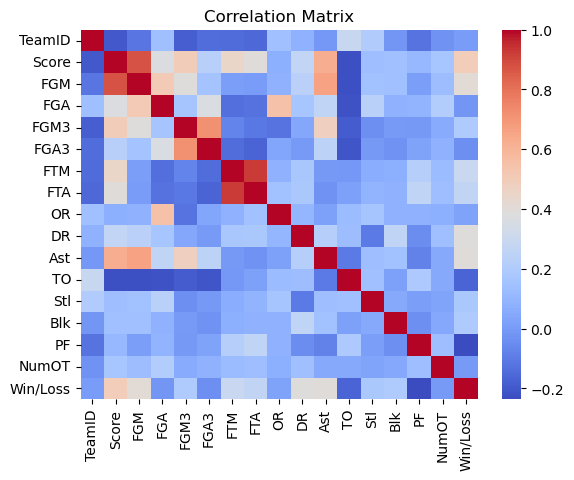

In [13]:
#correlation heatmap

corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Measure of Spread of Match Statistics by Winning Team')

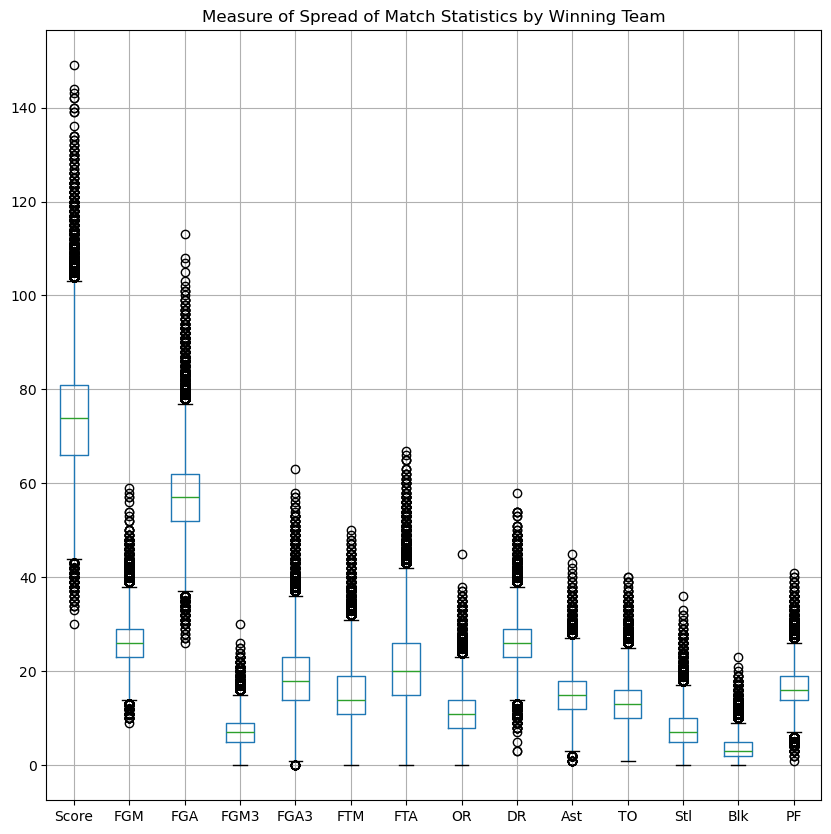

In [14]:
# measure of spread for winning teams
plt.figure(figsize=(10, 10))
w_df.boxplot(column = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"])
plt.title("Measure of Spread of Match Statistics by Winning Team")

Text(0.5, 1.0, 'Measure of Spread of Match Statistics by Losing Teams')

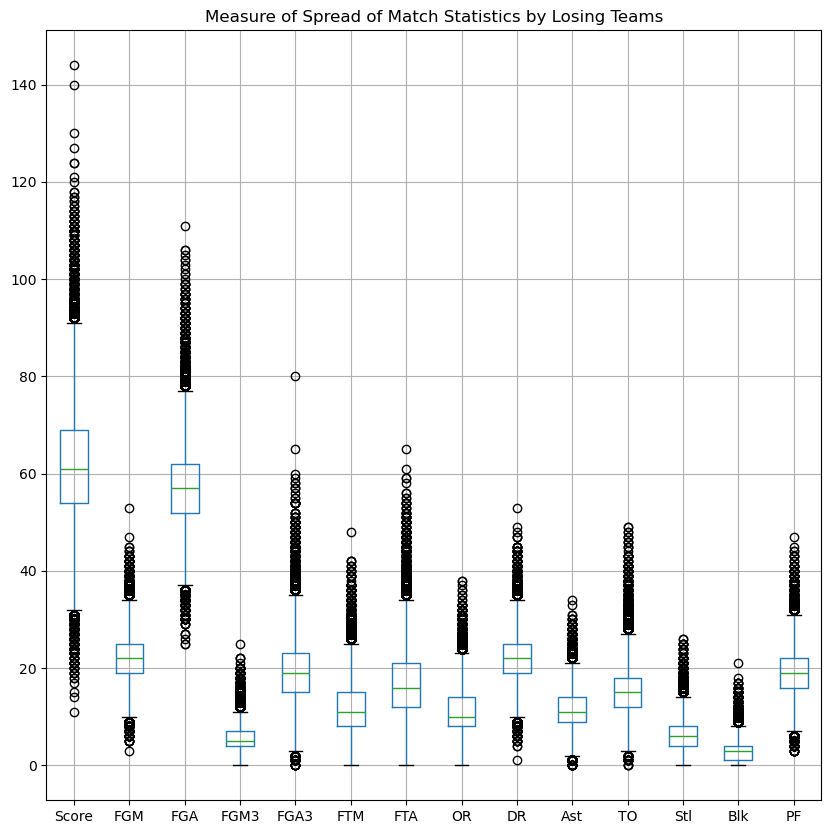

In [15]:
# measure of spread for losing teams
plt.figure(figsize=(10, 10))
l_df.boxplot(column = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"])
plt.title("Measure of Spread of Match Statistics by Losing Teams")

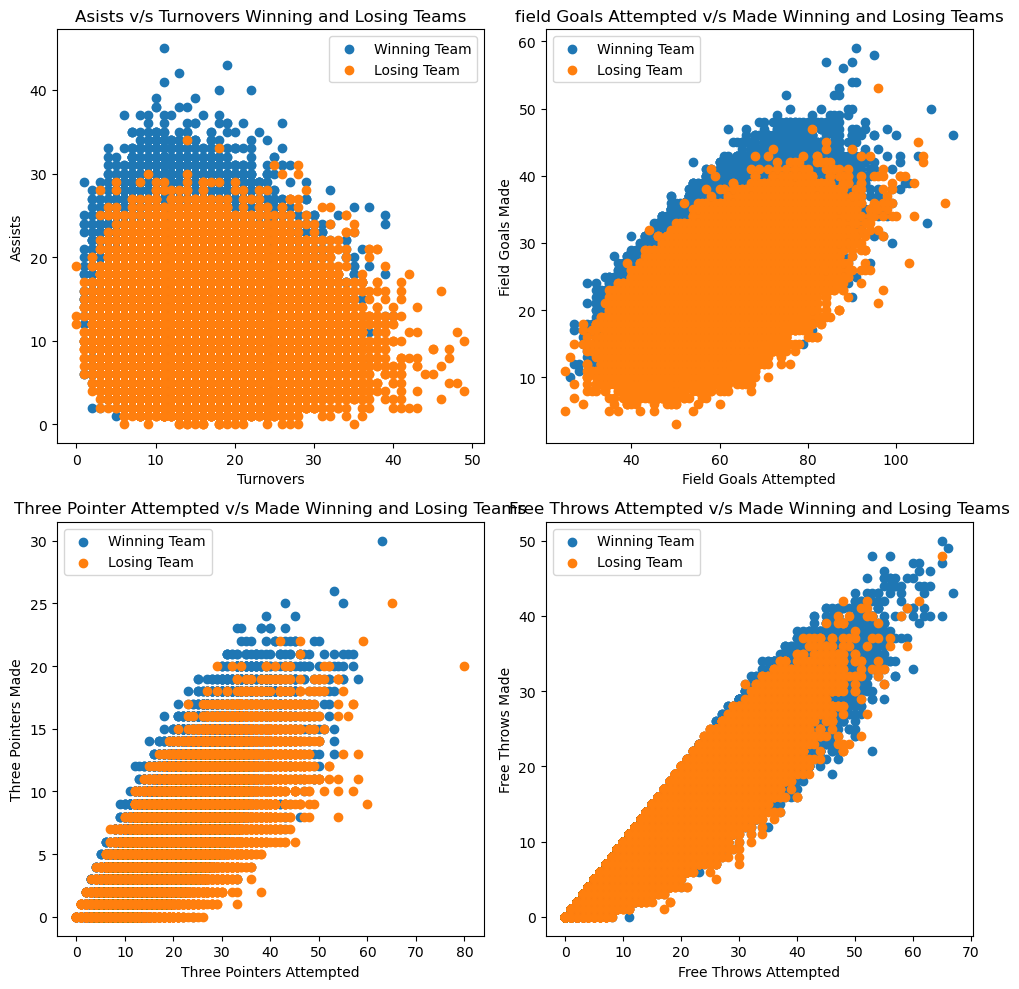

In [16]:
## Checking to see if different game statsitics have some sort of relationships with each other

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax[0,0].scatter(x = w_df["TO"], y = w_df["Ast"], label = "Winning Team")
ax[0,0].scatter(x = l_df["TO"], y = l_df["Ast"], label = "Losing Team")
ax[0,0].legend()
ax[0,0].set_xlabel("Turnovers")
ax[0,0].set_ylabel("Assists")
ax[0,0].set_title("Asists v/s Turnovers Winning and Losing Teams")

   
ax[0,1].scatter(x = w_df["FGA"], y = w_df["FGM"], label = "Winning Team")
ax[0,1].scatter(x = l_df["FGA"], y = l_df["FGM"], label = "Losing Team")
ax[0,1].legend()
ax[0,1].set_xlabel("Field Goals Attempted")
ax[0,1].set_ylabel("Field Goals Made")
ax[0,1].set_title("field Goals Attempted v/s Made Winning and Losing Teams")

   
ax[1,0].scatter(x = w_df["FGA3"], y = w_df["FGM3"], label = "Winning Team")
ax[1,0].scatter(x = l_df["FGA3"], y = l_df["FGM3"], label = "Losing Team")
ax[1,0].legend()
ax[1,0].set_xlabel("Three Pointers Attempted")
ax[1,0].set_ylabel("Three Pointers Made")
ax[1,0].set_title("Three Pointer Attempted v/s Made Winning and Losing Teams")

   
ax[1,1].scatter(x = w_df["FTA"], y = w_df["FTM"], label = "Winning Team")
ax[1,1].scatter(x = l_df["FTA"], y = l_df["FTM"], label = "Losing Team")
ax[1,1].legend()
ax[1,1].set_xlabel("Free Throws Attempted")
ax[1,1].set_ylabel("Free Throws Made")
ax[1,1].set_title("Free Throws Attempted v/s Made Winning and Losing Teams")

plt.tight_layout()
plt.show()

## Data Preprocessing

In [17]:
#initialising target variable
y = df["Win/Loss"]

#dropping target variable and team ID
df.drop(columns = ["TeamID", "Win/Loss"], inplace = True)

#normalising the data
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

X = pd.DataFrame(scaled_df, columns = df.columns)

In [18]:
#dividing the dataset into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Length of train data: {len(x_train)}")
print(f"Length of test data: {len(x_test)}")

Length of train data: 324585
Length of test data: 81147


## R3.1 Training the Baseline Model (Logistic Regression Model)

For problem statement 1, we are going to use the Logistic Regression model as the baseline model

In [19]:
/#model initialisation and model training
l_model = LogisticRegression()
l_model.fit(x_train, y_train)

LogisticRegression()

## Evaluating the Logistic Regression using different Performance Metrics

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_l = l_model.predict(x_test)

#classifciation report
accuracy_l = accuracy_score(y_test, y_pred_l)
precision_l = precision_score(y_test, y_pred_l)
recall_l = recall_score(y_test, y_pred_l)
f1_l = f1_score(y_test, y_pred_l)

print(f"Accuracy for Logistic Regression Model: {accuracy_l}")
print(f"Precision for Logistic Regression Model: {precision_l}")
print(f"Recall for Logistic Regression Model: {recall_l}")
print(f"F1 Score for Logistic Regression Model: {f1_l}")

Accuracy for Logistic Regression Model: 0.873451883618618
Precision for Logistic Regression Model: 0.8766265894809757
Recall for Logistic Regression Model: 0.8702753149790013
F1 Score for Logistic Regression Model: 0.8734394064506588


## R3.2 Training Advanced Machine Learning Models

### Training RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluating RandomForestClassifier using different Performance Metrics

In [22]:
y_pred_rf = rf_model.predict(x_test)

#classifciation report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy for Logistic Regression Model: {accuracy_rf}")
print(f"Precision for Logistic Regression Model: {precision_rf}")
print(f"Recall for Logistic Regression Model: {recall_rf}")
print(f"F1 Score for Logistic Regression Model: {f1_rf}")

Accuracy for Logistic Regression Model: 0.8499513229078093
Precision for Logistic Regression Model: 0.8568071008876109
Recall for Logistic Regression Model: 0.8416140678340742
F1 Score for Logistic Regression Model: 0.8491426305877688


### Using GridSearch to Improve Performance of RandomForestClaasifiers

In [ ]:
rf_model_ = RandomForestClassifier(random_state = 42)

# define the parameter grid
param_grid = {
    'n_estimators': range(100, 500, 100),
    'max_depth': range(10, 50, 10)
    }

# setup GridSearchCV
grid_search = GridSearchCV(rf_model_, param_grid = param_grid, cv = 3, scoring = 'accuracy', verbose = 1)

# fit to data
grid_search.fit(X, y)

# output best parameters and evaluate
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_rf_model.predict(x_test)
print("Model Perforance: ", classification_report(y_test, y_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
mlp_model = MLPClassifier(random_state = 42)
mlp_model.fit(x_train, y_train)

y_pred_mlp = mlp_model.predict(x_test)
accuracy_mlp = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score: {accuracy_mlp}")